In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Ahmed Ayman - insurance-data.csv')

In [3]:
data = df.copy()

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
data.duplicated().sum()

1

In [13]:
data[data.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
data.drop_duplicates(keep = 'first', inplace = True)

In [15]:
data.reset_index(drop = True, inplace = True)

In [16]:
data[data.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges


In [17]:
data.select_dtypes(include=['object'])

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1332,male,no,northwest
1333,female,no,northeast
1334,female,no,southeast
1335,female,no,southwest


In [18]:
data['region']=data['region'].astype('category').cat.codes
data['sex']=data['sex'].astype('category').cat.codes
data['smoker']=data['smoker'].astype('category').cat.codes

# Insights

In [19]:
data['charges'].mean()

13279.121486655948

In [20]:
data.charges.max()

63770.42801

In [21]:
data.charges.argmax()

543

In [22]:
data.charges.min()

1121.8739

In [23]:
data.charges.argmin()

939

### We sort correlation values ascendingly between charges column [label] and other columns [features]

In [24]:
data[data.columns].corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

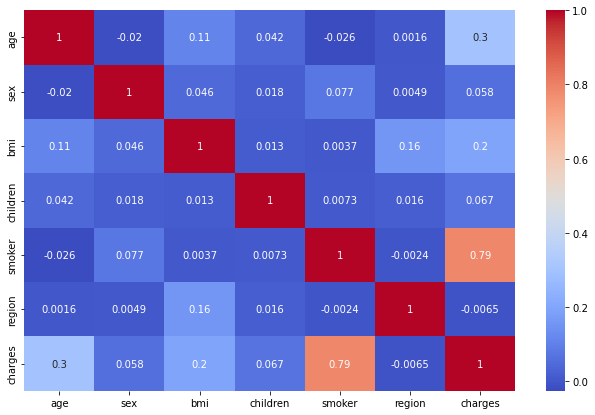

In [25]:
plt.subplots(figsize=(11, 7))
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

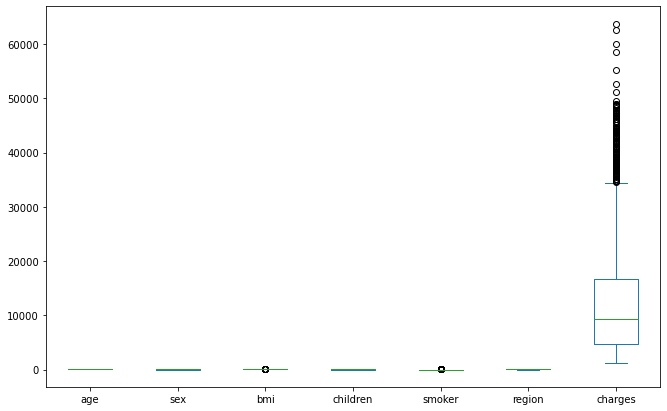

In [26]:
data.plot(kind = 'box', figsize = (11,7))
plt.show()

<AxesSubplot:>

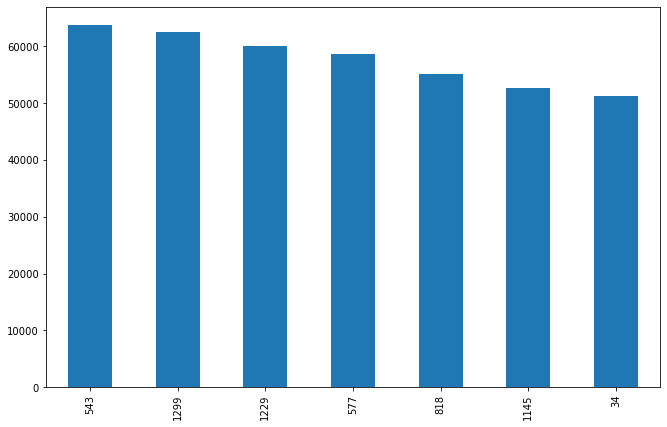

In [27]:
plt.subplots(figsize=(11, 7))
data['charges'].sort_values(ascending = False).nlargest(7).plot(kind = 'bar')

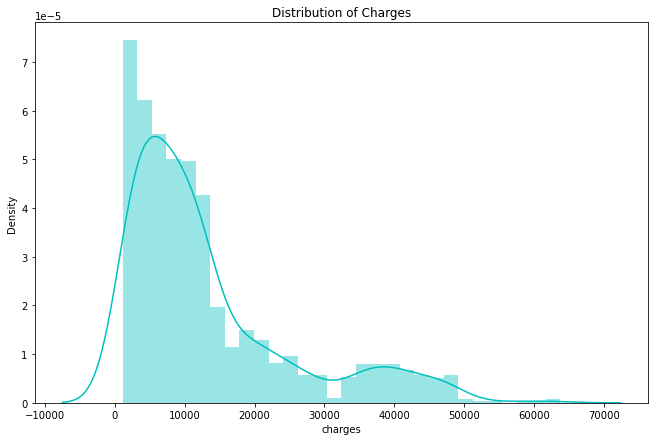

In [28]:
plt.subplots(figsize=(11, 7))
sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()

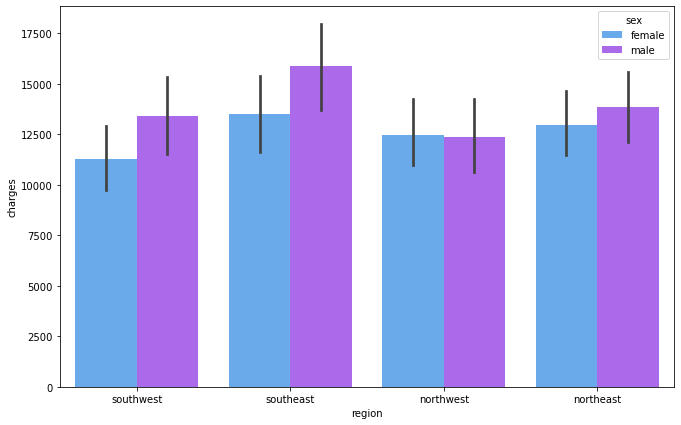

In [29]:
plt.subplots(figsize=(11, 7))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.show()

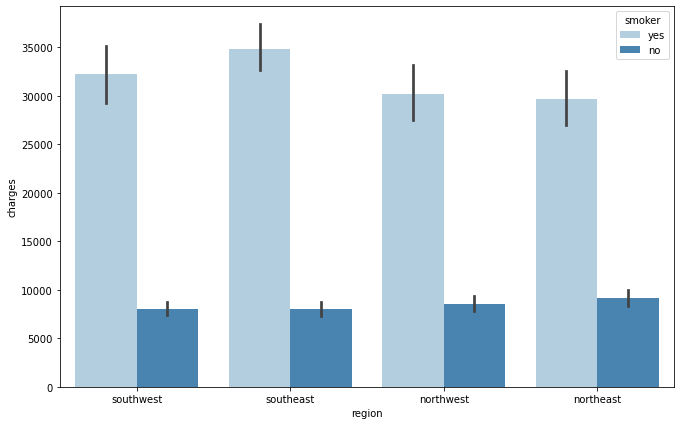

In [30]:
plt.subplots(figsize=(11, 7))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Blues')
plt.show()

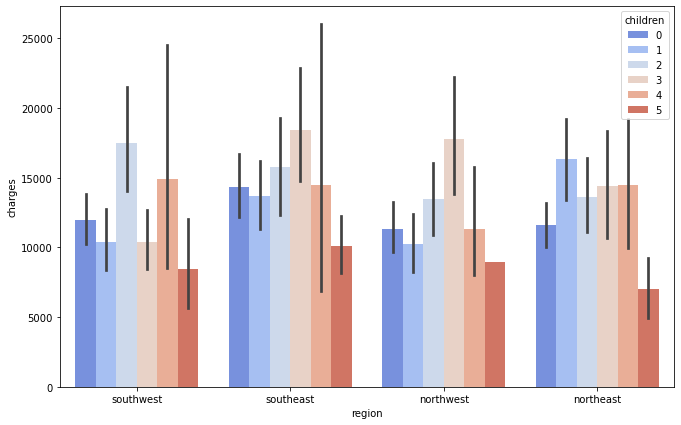

In [31]:
plt.subplots(figsize=(11, 7))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='coolwarm')
plt.show()

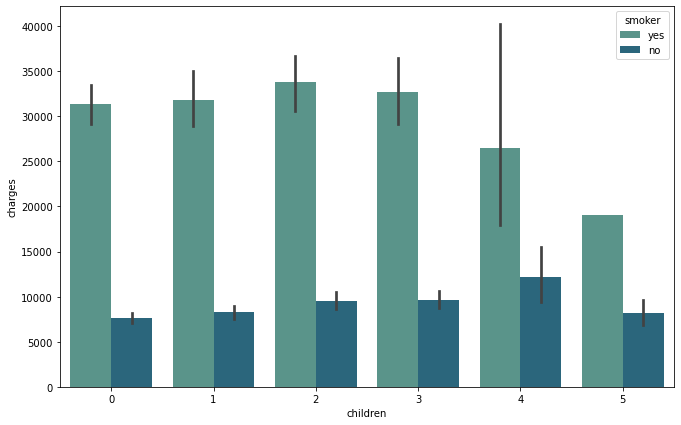

In [32]:
plt.subplots(figsize=(11, 7))
sns.barplot(data=df, x="children", y="charges", hue="smoker", palette = 'crest')
plt.show()

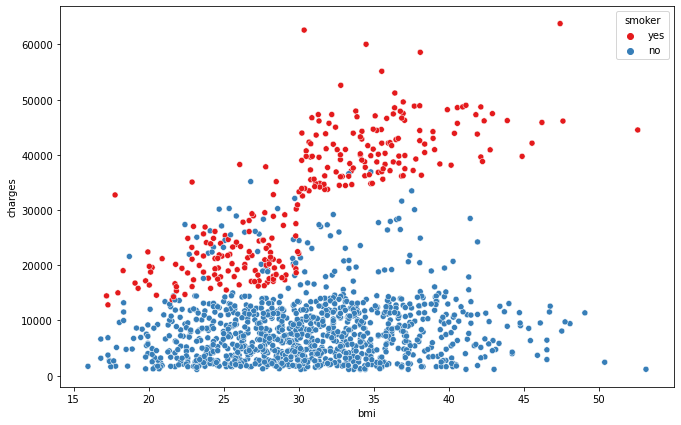

In [33]:
plt.subplots(figsize=(11, 7))
sns.scatterplot(data=df, x="bmi", y="charges", hue='smoker', palette='Set1')
plt.show()

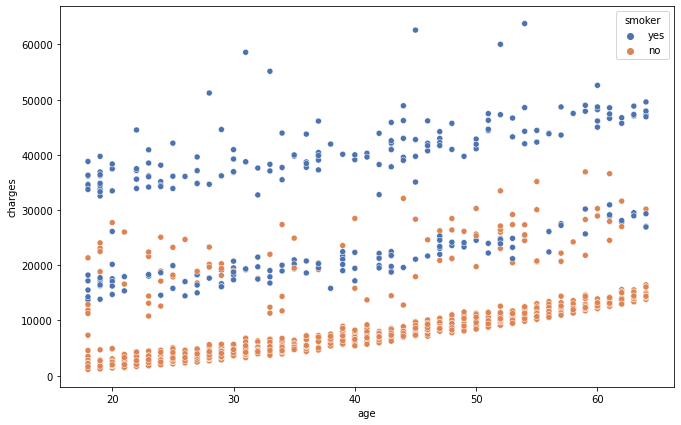

In [34]:
plt.subplots(figsize=(11, 7))
sns.scatterplot(data=df, x="age", y="charges", hue='smoker', palette='deep')
plt.show()

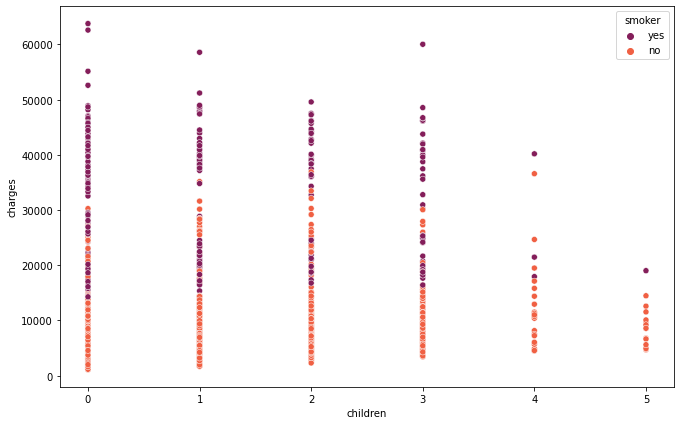

In [35]:
plt.subplots(figsize=(11, 7))
sns.scatterplot(data=df, x="children", y="charges", hue='smoker', palette='rocket')
plt.show()